In [20]:
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_02/redo/conn/spearman/stim_dependence'

# 01 - Begin Analysis

Enter the path to the dictionary generated by Notebook 01

In [21]:
dict_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_01/redo/conn/tmp/dataset_dict_baseline_comparison.json'

What correlation method would you like to use?
- Pearson is very fast, but depends on linearity and is sensitive to outliers
- Spearman is slower, but much more robust

One or Two-Tail P Values?

- ``` tails = 'one_tail' or tails = 'two_tail' ```

Numer of permutations? 
- Pearson is ~10x faster than Spearman

Would you like to compare maps wiht spearman or pearson?

- ``` method = 'spearman' or method = 'pearson' ```

Would you like to FWE correct the pairwise matrix?

- ``` fwe = True or fwe = False ```

In [22]:
tails = 'two_tail'
n_permutations = 1000
method = 'spearman'
fwe = False
datasets_to_flip = []# ['Parietal TMS Hebscher'] #['adni_Alzheimer', 'corbetta_memory', 'manitoba_memory', 'ms_memory']

Run it

In [23]:
from calvin_utils.ccm_utils.ccm_utils import CorrelationAnalysis
correlation_analysis = CorrelationAnalysis(data_dict_path=dict_path, 
                                           method=method, 
                                           datasets_to_flip=datasets_to_flip,
                                           n_permutations=n_permutations,
                                           out_dir=out_dir)
p_value, pairwise_p_values = correlation_analysis.run(tails, fwe)

Running permutations: 100%|██████████| 1000/1000 [01:21<00:00, 12.26it/s]

Calculating two-tailed p-values
The observed average similarity is: 0.2327483087129988
The two_tail p-value is: 0.299. This is the proportion of permuted averages that are greater than the observed average.
Overall p-value: 0.299


# 02 - Visualize Results

Similarity matrix (Signs Included)

In [24]:
correlation_analysis.original_similarity_matrix

array([[ 1.        , -0.46549662],
       [-0.46549662,  1.        ]])

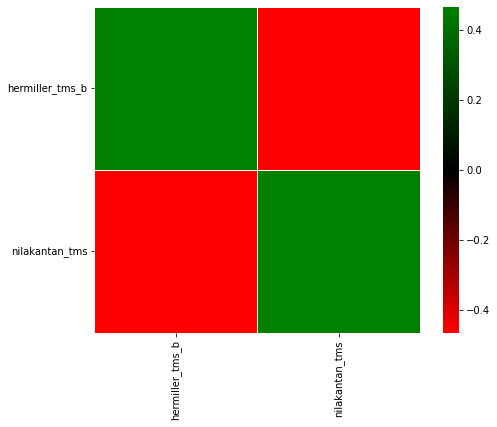

In [25]:
limit = correlation_analysis.matrix_heatmap(correlation_analysis.original_similarity_matrix, type='similarity', output_path=out_dir)

View the Overall Similarities of the Topology, Signs Aside

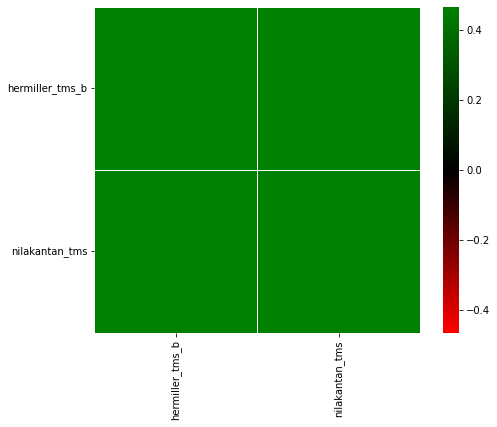

In [26]:
import numpy as np
limit = correlation_analysis.matrix_heatmap(np.abs(correlation_analysis.original_similarity_matrix), type='similarity', output_path=out_dir+'/heatmap_similarity_absval.svg')

Permuted Similarity

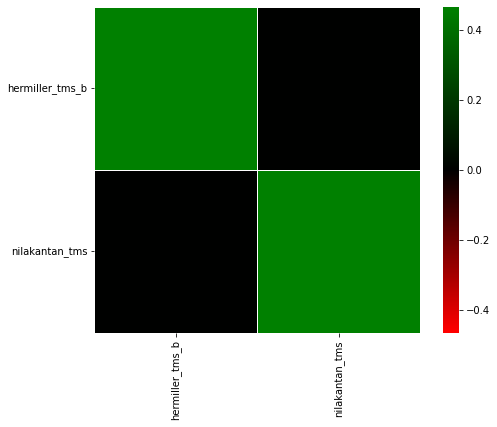

In [27]:
import numpy as np
avg_sim_mx = np.mean(correlation_analysis.permuted_similarity_tensor, axis=0)
l = correlation_analysis.matrix_heatmap(avg_sim_mx, type='similarity', output_path=out_dir+'/heatmap_similarity_permuted.svg', limit=limit)

Pairwise P values Matrix

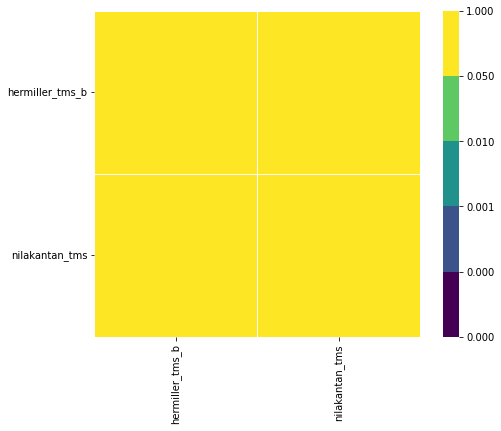

In [28]:
correlation_analysis.matrix_heatmap(pairwise_p_values, type='pvals', output_path=out_dir)

In [29]:
pairwise_p_values

array([[1.   , 0.299],
       [0.299, 1.   ]])

That's all
- calvin

In [2]:
import numpy as np
obsv = np.load('/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_02/redo/conn/spearman/original_similarity_matrix.npy')
perm = np.load('/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_02/redo/conn/spearman/permuted_similarity_tensor.npy')

In [ ]:
obs_l = np.tril(obsv)
perm_l = np.tril(perm)
# perm.shape

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.35842629,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.63531826,  0.22218925,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.17027191,  0.32943811,  0.26536201,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-0.50599218, -0.20797578, -0.42032899, -0.20090256,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-0.32916302,  0.22186581, -0.14063844,  0.25419501,  0.26435873,
         1.        ,  